<a href="https://colab.research.google.com/github/AdriMA3/introgeodf/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/intro_geodataframe/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Geo Dataframe

The geodataframe (GDF) is a dataframe (DF) where every row represents an spatial element (point, line, polygon).

The most common file type that stores spatial elements is the shapefile. Let's take a look at some of them:

1. In GitHub (cloud), create a repository named: introgeodf.
2. Clone that repo to a local folder in your computer.
3. In that local folder in your computer, create a folder named **maps**.
4. Go to **Paidea** and download three compressed files from the folder **WorldMaps**.

You may see something like this:

<img src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/mapsFolderImage.png?raw=true">

You can decompress those files:

<img title="a title" alt="Alt text" src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/folderRar_1.png?raw=true">

Now, take a look a **World_Countries**:

<img src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/imageCountries_shp.png?raw=true">

There, you see that this **one map** requires **several files**. That is the nature of the shapefile.

Let's read the file with the help of **geopandas**:

In [1]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

Let's use some familiar DF functions:

In [2]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [3]:
# dimensions
countries.shape

(252, 2)

In [4]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [5]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [6]:
# what geometry?
countries.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [7]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [8]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


As you see, those pandas commands are working fine, but now we have a new column type: **geometry**. Let's see this map of countries:

<Axes: >

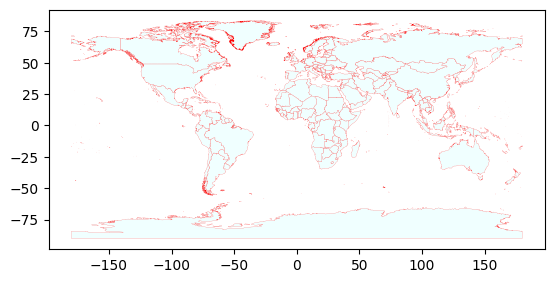

In [9]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of lines
               linewidth=0.1) #thickness of lines

Let's open the other maps:

In [10]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [11]:
# what geo?
rivers.geom_type.unique(), cities.geom_type.unique()

(array(['LineString', 'MultiLineString'], dtype=object),
 array(['Point'], dtype=object))

This is the rivers map:

<Axes: >

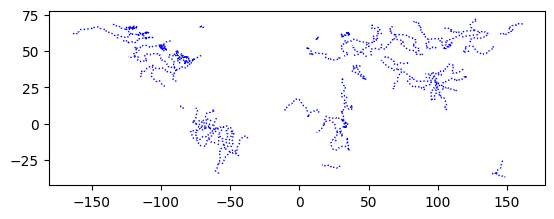

In [12]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

This is the cities map:

<Axes: >

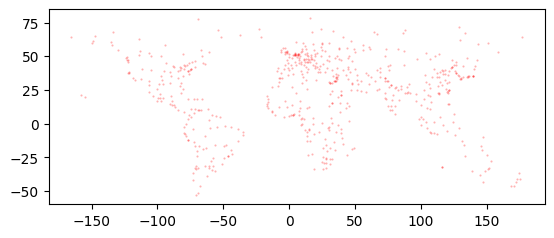

In [13]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

You can start by creating the layer on the back (the base), and add layers on top:

<Axes: >

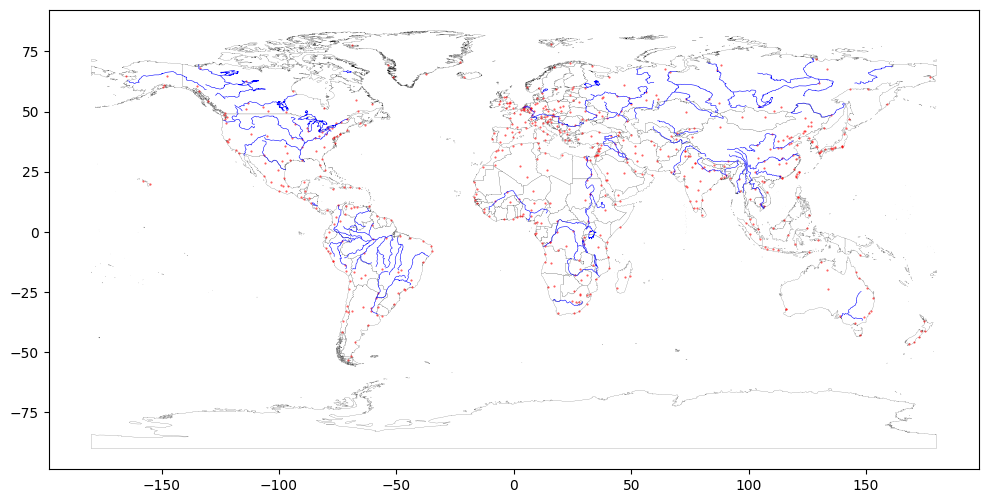

In [14]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...


Saving into a different format (not shapefile):

In [15]:
# ONE file - SEVERAL layers
import os

countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")


# Map Projection

The CRS is a very important property of the maps. They affect three some aspects:

* shape
* area
* scale
* direction

Most maps come with a default CRS: 4326. Pay attention:

In [16]:
chile=countries[countries.COUNTRY=='Chile']

In [17]:
chile.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
# check units of measurement
chile.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [19]:
# is this CRS projected?
chile.crs.is_projected

False

Polygons have a centroid. When we try getting a centroid from an **unprojected** polygon, you get:

In [20]:
# centroid
chile.centroid

<ipython-input-20-32aa05a27bc0>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  chile.centroid


,0
42,POINT (-71.37398 -37.8529)


## Reprojecting

A projected CRS will have units in meters or feet (or similar). You can request a crs per country [here](https://epsg.io/?q=brazil+kind%3APROJCRS):

In [21]:
# recommended for Brazil (meters)
chile.to_crs(5361).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [22]:
# now this works with no warning
chile.to_crs(5361).centroid

,0
42,POINT (317834.891 5987945.963)


<Axes: >

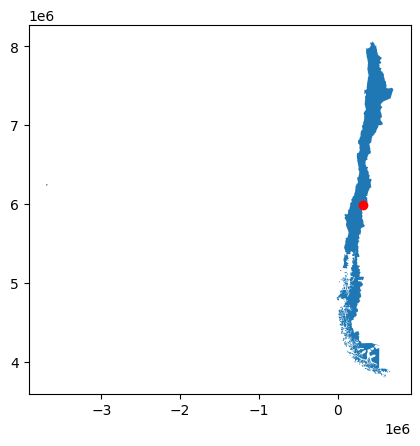

In [23]:
# replotting:

base5361=chile.to_crs(5361).plot()
chile.to_crs(5361).centroid.plot(color='red',ax=base5361)

Let's keep the projected version for all our maps:

In [24]:
cities_chile_5361=cities[cities.COUNTRY=='Chile'].to_crs(5361)

In [33]:
riversChile_clipped=gpd.clip(rivers,chile)

In [39]:
chile_5361=chile.to_crs(5361)

rivers_chile_5361=riversChile_clipped.to_crs(chile_5361.crs)

<ipython-input-40-8669403ce6af>:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  rivers_chile_5361.plot(edgecolor='blue', linewidth=0.4,


<Axes: >

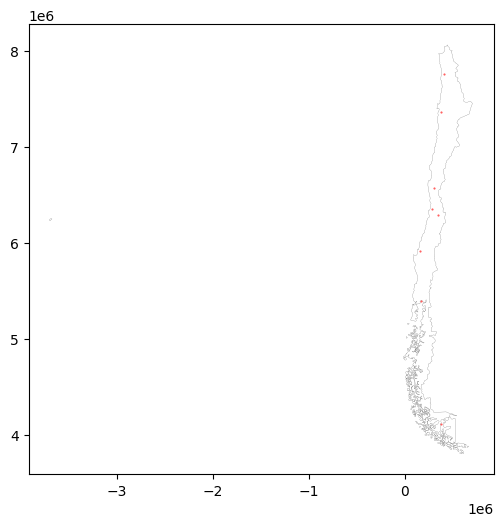

In [40]:
base =chile_5361.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(6,6))

rivers_chile_5361.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities_chile_5361.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...


In [41]:
## saving


import os

chile_5361.to_file(os.path.join("maps","chileMaps_5361.gpkg"), layer='country', driver="GPKG")
cities_chile_5361.to_file(os.path.join("maps","chileMaps_5361.gpkg"), layer='cities', driver="GPKG")
rivers_chile_5361.to_file(os.path.join("maps","chileMaps_5361.gpkg"), layer='rivers', driver="GPKG")
#brazil_5641.centroid.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='centroid', driver="GPKG")

### Exercise 1
<div class="alert-success">

1. Reproject your country's map layers.
2. Plot the reprojected layers
3. Save the reprojected layers as **gpkg**.
    
</div>

## Creating Spatial data

You have a "data"folder in **Paideia** with a CSV file with information on the airports in Brazil. Create a similar 'data' folder in your local computer, inside the current _repo_.

Let's open the **CSV**:

In [43]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","chile-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,scheduled_service,gps_code,icao_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6015,SCEL,large_airport,Comodoro Arturo Merino Benítez International A...,-33.393002,-70.785797,1555.0,SA,Chile,CL,...,1,SCEL,SCEL,SCL,NaN,http://www.aeropuertosantiago.cl/ingles/index.php,https://en.wikipedia.org/wiki/Comodoro_Arturo_...,NaN,51150,2009-01-31T17:19:23+00:00
1,6009,SCCI,medium_airport,President Carlos Ibañez del Campo Internationa...,-53.002602,-70.854599,139.0,SA,Chile,CL,...,1,SCCI,SCCI,PUQ,NaN,NaN,https://en.wikipedia.org/wiki/Carlos_Ibanez_De...,NaN,750,2021-12-22T15:07:05+00:00
2,6043,SCTE,medium_airport,El Tepual Airport,-41.438900,-73.094002,294.0,SA,Chile,CL,...,1,SCTE,SCTE,PMC,NaN,NaN,https://en.wikipedia.org/wiki/El_Tepual_Airport,NaN,750,2008-07-12T07:26:32+00:00
3,6026,SCIP,medium_airport,Mataveri Airport,-27.164801,-109.421997,227.0,SA,Chile,CL,...,1,SCIP,SCIP,IPC,NaN,NaN,https://en.wikipedia.org/wiki/Mataveri_Interna...,"Rapa Nui, Easter Island",750,2011-10-28T10:05:26+00:00
516,348840,SHUE,heliport,Dinahue Heliport,-36.770833,-73.106667,10.0,SA,Chile,CL,...,0,SHUE,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-10-16T11:09:28+00:00
517,594800,CL-0036,closed,Basso Field,-40.406950,-73.160960,236.0,SA,Chile,CL,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2025-03-09T03:15:22+00:00
518,348836,SHAF,heliport,Santa Carolina Heliport,-34.826222,-72.066622,164.0,SA,Chile,CL,...,0,SHAF,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-10-16T03:17:07+00:00
519,45093,SHVI,heliport,Villarica Park Lake Heliport,-39.301944,-72.088889,804.0,SA,Chile,CL,...,0,SHVI,NaN,NaN,NaN,NaN,NaN,NaN,0,2009-10-16T21:50:20+00:00


This needs some cleaning:

In [44]:
# bye first row
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,scheduled_service,gps_code,icao_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6009,SCCI,medium_airport,President Carlos Ibañez del Campo Internationa...,-53.002602,-70.854599,139.0,SA,Chile,CL,...,1,SCCI,SCCI,PUQ,NaN,NaN,https://en.wikipedia.org/wiki/Carlos_Ibanez_De...,NaN,750,2021-12-22T15:07:05+00:00
1,6043,SCTE,medium_airport,El Tepual Airport,-41.438900,-73.094002,294.0,SA,Chile,CL,...,1,SCTE,SCTE,PMC,NaN,NaN,https://en.wikipedia.org/wiki/El_Tepual_Airport,NaN,750,2008-07-12T07:26:32+00:00
2,6026,SCIP,medium_airport,Mataveri Airport,-27.164801,-109.421997,227.0,SA,Chile,CL,...,1,SCIP,SCIP,IPC,NaN,NaN,https://en.wikipedia.org/wiki/Mataveri_Interna...,"Rapa Nui, Easter Island",750,2011-10-28T10:05:26+00:00
3,6007,SCCF,medium_airport,El Loa Airport,-22.498199,-68.903603,7543.0,SA,Chile,CL,...,1,SCCF,SCCF,CJC,NaN,NaN,https://en.wikipedia.org/wiki/El_Loa_Airport,NaN,750,2024-04-29T19:45:32+00:00
4,6018,SCFA,medium_airport,Andrés Sabella Gálvez International Airport,-23.444501,-70.445099,455.0,SA,Chile,CL,...,1,SCFA,SCFA,ANF,NaN,NaN,https://en.wikipedia.org/wiki/Andr%C3%A9s_Sabe...,Cerro Moreno Airport,750,2019-02-15T15:15:06+00:00


In [45]:
# keep the  columns needed

infoairports.columns


Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'icao_code', 'iata_code', 'local_code',
       'home_link', 'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [46]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           519 non-null    object 
 1   type           519 non-null    object 
 2   latitude_deg   519 non-null    float64
 3   longitude_deg  519 non-null    float64
 4   elevation_ft   517 non-null    float64
 5   region_name    519 non-null    object 
 6   municipality   513 non-null    object 
dtypes: float64(3), object(4)
memory usage: 28.5+ KB


Some formatting:

In [47]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

In [48]:
# now
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           519 non-null    object 
 1   type           519 non-null    object 
 2   latitude_deg   519 non-null    float64
 3   longitude_deg  519 non-null    float64
 4   elevation_ft   517 non-null    float64
 5   region_name    519 non-null    object 
 6   municipality   513 non-null    object 
dtypes: float64(3), object(4)
memory usage: 28.5+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

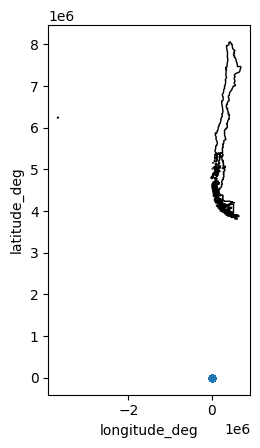

In [50]:
# let's plot

base =chile_5361.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

Why is it wrong?

<Axes: >

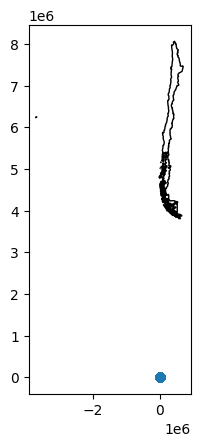

In [51]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=chile.crs.to_epsg())# the coordinates were in degrees - unprojected

# let's plot

base = chile_5361.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [52]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

Let's re project!

<Axes: >

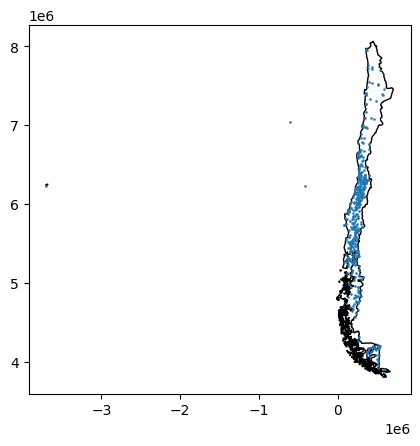

In [57]:
airports_5361=airports.to_crs(5361)

## then

base =chile_5361.plot(color='white', edgecolor='black')
airports_5361.plot(ax=base,markersize=0.7)

Remember you have type of airports:

In [58]:
airports_5361['type'].value_counts() # this will not work: airports.type.value_counts()

,count
type,
small_airport,346
heliport,119
medium_airport,32
closed,22


We may use that in the future. For now, just rename the **type** column to a different one.

In [59]:
airports_5361.rename(columns={'type':'kind'},inplace=True)

## adding the airports to GPKG
airports_5361.to_file(os.path.join("maps","chileMaps_5361.gpkg"), layer='airports', driver="GPKG")

### Exercise 2
<div class="alert-success">

1. Find the airports for your country [here](https://ourairports.com/data/). The data is in a CSV file.
2. Create projected layer of airports.
3. Plot all the layers and airports on top.
    
</div>

<a class="anchor" id="11"></a>

## Formating Geoseries projections



You know **brazil_5641** is a multipolygon:

In [60]:
chile_5361

,COUNTRY,geometry
42,Chile,"MULTIPOLYGON (((180467.607 4269573.421, 181336..."


Sometime, you just need the border (lines):

In [61]:
chile_5361.boundary

,0
42,"MULTILINESTRING ((180467.607 4269573.421, 1813..."


<Axes: >

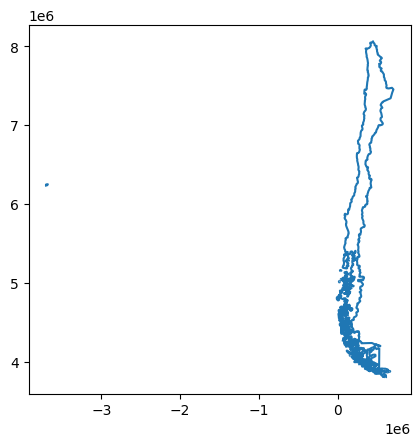

In [62]:
# This is just the borderline
chile_5361.boundary.plot()

Always check the data type:

In [63]:
# does 'boundary' return a GDF?
type(chile_5361.boundary)

geopandas.geoseries.GeoSeries

Some operations in geopandas require GDF or GS. If you need a GDF instead of a GS:

In [64]:
# converting into GDF
chile_5361.boundary.to_frame()

,0
42,"MULTILINESTRING ((180467.607 4269573.421, 1813..."


In [65]:
chile_5361.boundary.to_frame().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 42 to 42
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


Notice you get a very simple GDF, and you may want to add some information:

In [66]:
# conversion
chile_border=chile_5361.boundary.to_frame()

# new column (optional)
chile_border['name']='Chile'

# renaming the geometry column
chile_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
chile_border = chile_border.set_geometry("geometry")

# verifying:
chile_border.crs

<Projected CRS: EPSG:5361>
Name: SIRGAS-Chile 2002 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Chile - 72°W to 66°W, onshore and offshore.
- bounds: (-72.0, -59.87, -66.0, -17.5)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: SIRGAS-Chile realization 1 epoch 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [67]:
chile_border

,geometry,name
42,"MULTILINESTRING ((180467.607 4269573.421, 1813...",Chile


You can add this GDF as a layer.

### Exercise 3

<div class="alert-success">
    
1. Check if your country is a polygon or multipolygon.
    
2. Recover just the boundaries of that country.
    
3. Turn the boundary into a GDF.
</div>

<a class="anchor" id="12"></a>

## Maps Lacking CRS information

Reprojecting seems a simple process, but you might find some interesting cases.

Download the compressed file "Brazil_subnational". Unzip or decompress that files. Move the decompressed folder into your current _maps_ folder.

Let's read the maps on _states_(adm1) and _municipalities_ (adm2):

In [68]:
chile_Regional=gpd.read_file(os.path.join("maps","chi_adm_ibge_shp","Regional.shp"))
chile_comunas=gpd.read_file(os.path.join("maps","chi_adm_ibge_shp","comunas.shp"))

They are maps, for sure:

In [69]:
type(chile_Regional), type(chile_comunas)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [70]:
chile_Regional.geometry.head()

,geometry
0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
1,"MULTIPOLYGON (((-7810213.515 -2298008.28, -781..."
2,"MULTIPOLYGON (((-7870470.961 -2985679.186, -78..."
3,"MULTIPOLYGON (((-7494057.535 -7542535.383, -74..."
4,"MULTIPOLYGON (((-8413517.696 -6234055.255, -84..."


In [71]:
chile_comunas.geometry.head()

,geometry
0,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
1,"POLYGON ((-7831651.813 -4022443.109, -7831596...."
2,"POLYGON ((-7892616.357 -4060673.364, -7892621...."
3,"POLYGON ((-7906457.717 -4051723.734, -7906266...."
4,"POLYGON ((-8121756.186 -4645860.295, -8121644...."


But, notice this:

In [75]:
chile_comunas.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [76]:
chile_Regional.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

They do not have crs information, however they can be plotted:

<Axes: >

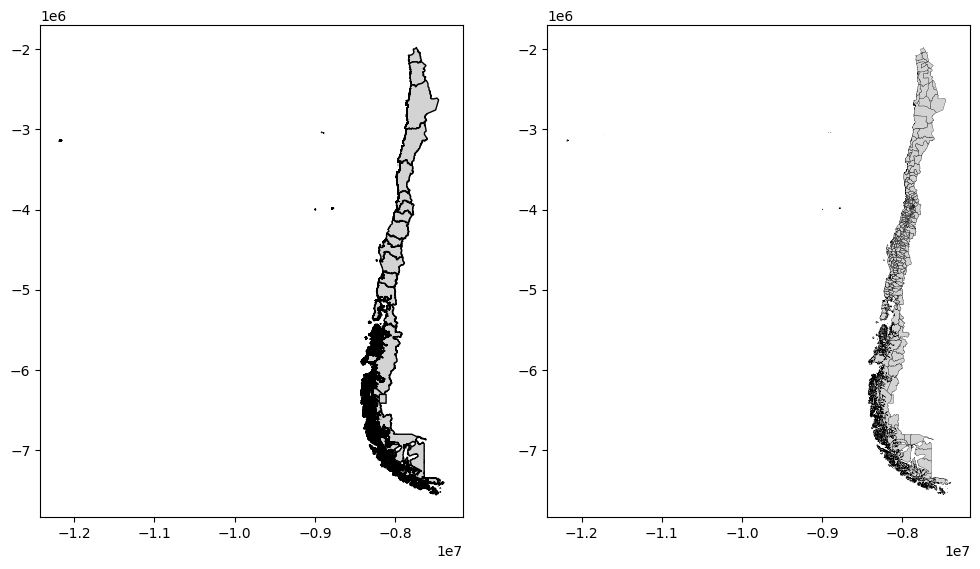

In [77]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

chile_Regional.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
chile_comunas.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)


Since we are using the crs 5641 for Brazil, the initial strategy could be to set the CRS with the right projection :

In [ ]:
## uncomment this to see the error message
# brazil_states.to_crs(5641)

Python says _"Please set a crs on the object first"_. This would mean to know the actual projection, of the geometry:

From the plots above and the rows seen, we conclude the maps are unprojected; then:

In [ ]:
# set as unprojected
##hile_Regional.crs = "EPSG:4326"
#chile_comunas.crs = "EPSG:4326"

Now, we can reproject:

In [ ]:
#chile_Regional=chile_Regional.to_crs(5361)
#chile_comunas=chile_comunas.to_crs(5361)

In [78]:
chile_Regional.to_file(os.path.join("maps","chileMaps_5361.gpkg"), layer='Regional', driver="GPKG")
chile_comunas.to_file(os.path.join("maps","chileMaps_5361.gpkg"), layer='comunas', driver="GPKG")

### Exercise 4

<div class="alert-success">

1. Look for sub administrative divisions of your country
2. Check all the CRSs of those divisions
3. If you find one CRS is missing, fill the CRS with the right projection. If not, just state nothing is to be done.
</div>

## Geo Merging

The countries map has no interesting information beyond the geometry.

In [79]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


Let add some information to each country:

Desde aqui se puede hacer para mi varible electricity

In [80]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

,Country,Officialstatename,InternetccTLD,iso2,iso3,fragility,co2,region,ForestRev_gdp
0,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,105.0,7893000.0,SOUTH ASIA,0.20
1,ALBANIA,The Republic of Albania,.al,AL,ALB,58.9,3794000.0,EUROPE,0.18
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA,75.4,151633000.0,AFRICA,0.10
3,ANGOLA,The Republic of Angola,.ao,AO,AGO,87.8,19362000.0,AFRICA,0.36
4,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG,54.4,729000.0,CENTRAL AMERICA AND THE CARIBBEAN,0.00


We want to add the _fragilityCia_ data into the map. That is the merging process.
For that, we need a common column. The _Country_ column is the option.

In [81]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

It is very unlikely the names are written the same. Verify:

In [82]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

Check here:

In [83]:
onlyFragilCia

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)',
 'VIET NAM'}

In [84]:
# and here
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAHAMAS',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ERITREA',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GAMBIA',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'HE

## Fuzzy merging

Let's find similar names:

In [85]:
!pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.4 MB/s eta 0:00:00


In [86]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)',
  ('SOUTH GEORGIA AND THE SOUTH SANDWICH IS (UK)', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA'

In [87]:
# keeping high scores

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('NORTHERN MARIANA ISLANDS (THE)', ('NORTHERN MARIANA ISLANDS (US)', 91)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('WESTERN SAMOA', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZANIA, 

Preparing a _dict_ of changes:

In [88]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)': 'NORTHERN MARIANA ISLANDS (US)',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'WESTERN SAMOA',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'UNITED 

Making changes and updating:

In [89]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('KOREA (THE REPUBLIC OF)',
  ('SOUTH GEORGIA AND THE SOUTH SANDWICH IS (UK)', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [90]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|SWA|KOR')]

,COUNTRY,geometry
17,BOTSWANA,"POLYGON ((26.40114 -24.63189, 26.38996 -24.627..."
120,NORTH KOREA,"POLYGON ((125.62979 38.65694, 125.51721 38.717..."
122,SOUTH KOREA,"MULTIPOLYGON (((126.86922 36.0606, 126.8591 36..."
126,LAOS,"POLYGON ((104.257 17.88763, 104.23943 17.93722..."
243,SWAZILAND,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."


In [91]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'SOUTH KOREA':'KOREA (THE REPUBLIC OF)'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [92]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

{'CABO VERDE': 'CAPE VERDE',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [93]:
# changing
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

We can not improve the situation.

Now, when you merge a GDF with a DF, **the GDF has to be on the left**:

In [94]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            170 non-null    object  
 1   geometry           170 non-null    geometry
 2   Officialstatename  170 non-null    object  
 3   InternetccTLD      170 non-null    object  
 4   iso2               169 non-null    object  
 5   iso3               170 non-null    object  
 6   fragility          170 non-null    float64 
 7   co2                170 non-null    float64 
 8   region             170 non-null    object  
 9   ForestRev_gdp      170 non-null    float64 
dtypes: float64(3), geometry(1), object(6)
memory usage: 13.4+ KB


# Choropleths

## Transformation of data values

### Re Scaling

We should plan how to color the polygons based on some variable, let me check our variables of interest:

In [95]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [96]:

pd.melt(theMapAndData[DataNames])

,variable,value
0,fragility,54.40
1,fragility,105.00
2,fragility,75.40
3,fragility,73.20
4,fragility,58.90
...,...,...
505,ForestRev_gdp,4.45
506,ForestRev_gdp,1.61
507,ForestRev_gdp,2.65
508,ForestRev_gdp,0.39


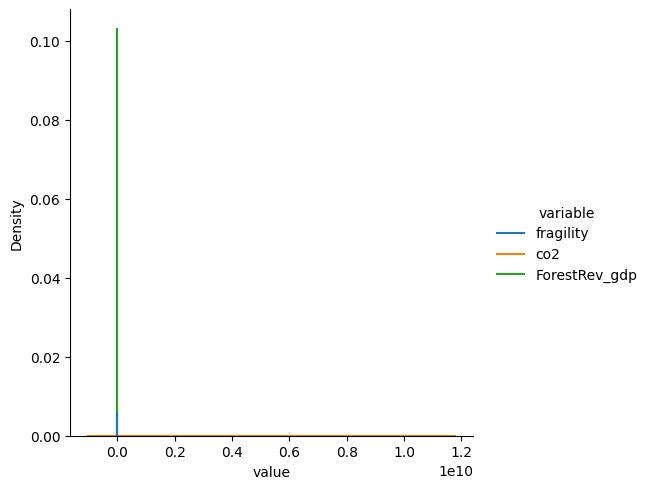

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

The variables are in different units, we should try a data rescaling strategy:

In [98]:
!pip install -U scikit-learn

* **StandardScaler**:

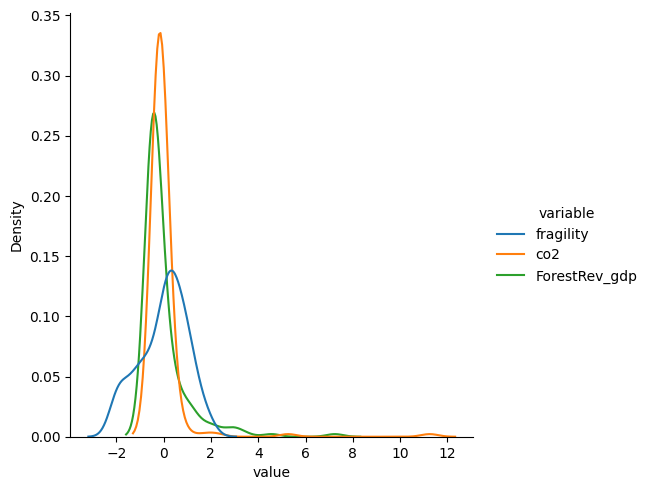

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **MinMaxScaler**:

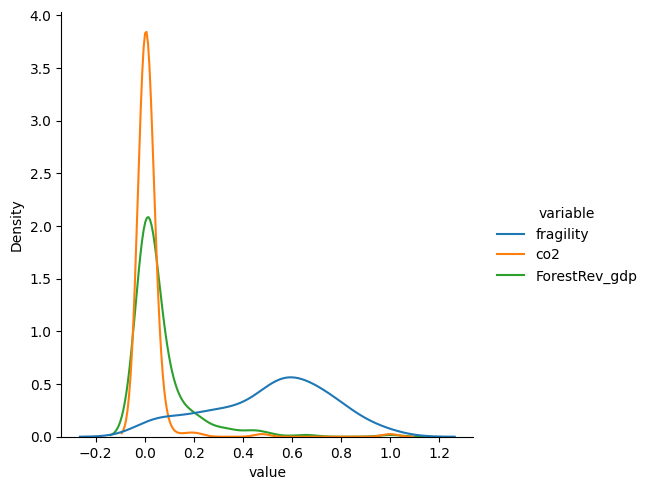

In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **RobustScaler**:

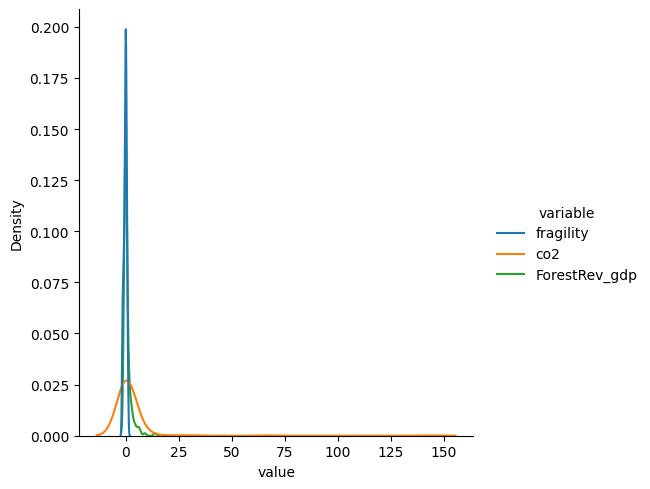

In [101]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **QuantileTransformer**:

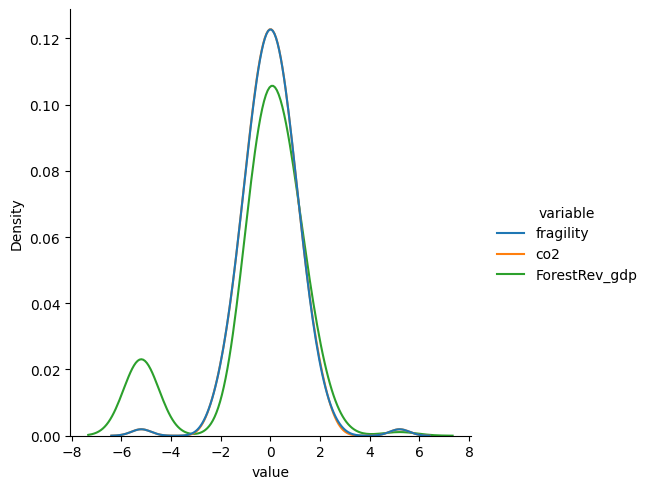

In [102]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

Let's keep the last one:

In [104]:

theMapAndData['co2_Qt']=QtScaled_data[:,1]
theMapAndData['ForestRev_gdp_Qt']=QtScaled_data[:,2]

### Discretizing

I will keep the _data_Qt_ data frame. Now, I want cut the data.
Please install [**numba**](https://numba.readthedocs.io/en/stable/user/installing.html) before runing the next code; also make sure you have **pysal**, **mapclassify** and **numpy** installed:

In [ ]:
! pip show numba mapclassify numpy

In [105]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 4.3 MB/s eta 0:00:00


Let me discretize **fragility_Qt**:

In [106]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.co2_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [107]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

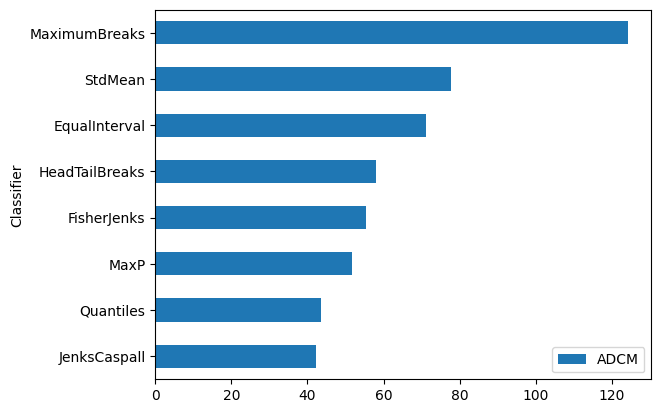

In [108]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [109]:
theMapAndData['co2_Qt_jc5'] = jc5.yb

In [110]:
# there you are
theMapAndData[['co2_Qt','co2_Qt_jc5']].head()

,co2_Qt,co2_Qt_jc5
0,-1.392136,0
1,-0.286256,2
2,0.901777,3
3,0.284856,2
4,-0.725128,1


Let's check the mean of 'fragility_Qt' by the labels of the columns created (from '0' to '4')

In [111]:
indexList=['co2_Qt_jc5'] # add more?
aggregator={'co2_Qt': ['mean']}

pd.concat([theMapAndData[['co2_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,co2_Qt_jc5,co2_Qt
,,mean
0,0,-1.608993
1,1,-0.626060
2,2,-0.008105
3,3,0.625737
4,4,1.626888


We could create a new column:

In [112]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['co2_Qt_jc5_cat']=theMapAndData.loc[:,'co2_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['co2_Qt','co2_Qt_jc5','co2_Qt_jc5_cat']].head(20)

,co2_Qt,co2_Qt_jc5,co2_Qt_jc5_cat
0,-1.392136,0,0_Great
1,-0.286256,2,2_Middle
2,0.901777,3,3_Bad
3,0.284856,2,2_Middle
4,-0.725128,1,1_Good
5,-0.493152,1,1_Good
6,0.130552,2,2_Middle
7,0.948860,3,3_Bad
8,1.415035,4,4_Poor
9,0.609136,3,3_Bad


We are ready for a choropleth:

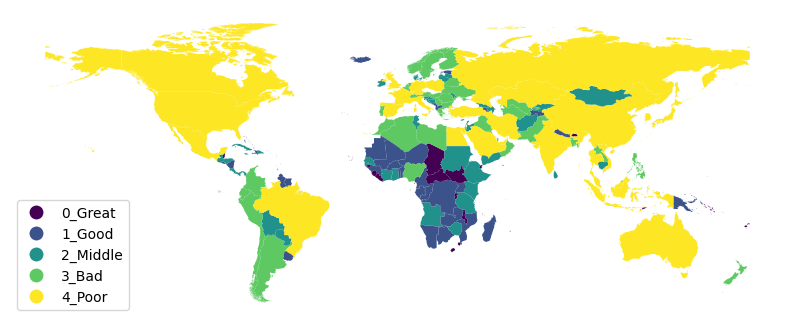

In [113]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='co2_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

However, once you know the ADCM, you can request the choropleth without creating a variable:

In [114]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.ForestRev_gdp_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [115]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

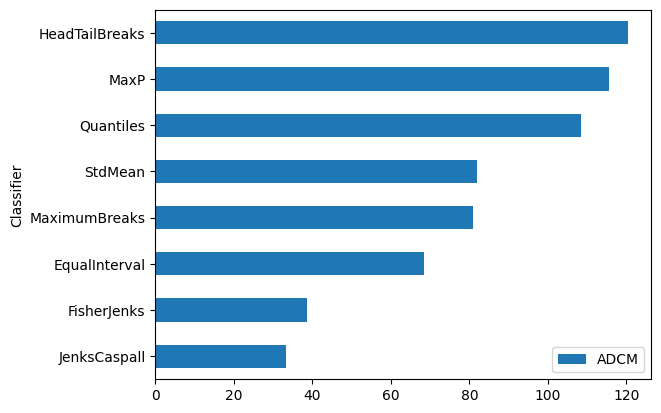

In [116]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [117]:
theMapAndData['ForestRev_gdp_Qt_jc5'] = jc5.yb

In [118]:
# there you are
theMapAndData[['ForestRev_gdp_Qt','ForestRev_gdp_Qt_jc5']].head()

,ForestRev_gdp_Qt,ForestRev_gdp_Qt_jc5
0,-5.199338,0
1,-0.076809,2
2,-0.338888,1
3,-0.791639,1
4,-0.102491,2


In [119]:
indexList=['ForestRev_gdp_Qt_jc5'] # add more?
aggregator={'ForestRev_gdp_Qt': ['mean']}

pd.concat([theMapAndData[['ForestRev_gdp_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,ForestRev_gdp_Qt_jc5,ForestRev_gdp_Qt
,,mean
0,0,-5.199338
1,1,-0.686007
2,2,0.015000
3,3,0.656443
4,4,1.654991


In [120]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['ForestRev_gdp_Qt_jc5_cat']=theMapAndData.loc[:,'ForestRev_gdp_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['ForestRev_gdp_Qt','ForestRev_gdp_Qt_jc5','ForestRev_gdp_Qt_jc5_cat']].head(20)

,ForestRev_gdp_Qt,ForestRev_gdp_Qt_jc5,ForestRev_gdp_Qt_jc5_cat
0,-5.199338,0,0_Great
1,-0.076809,2,2_Middle
2,-0.338888,1,1_Good
3,-0.791639,1,1_Good
4,-0.102491,2,2_Middle
5,0.080756,2,2_Middle
6,0.195412,2,2_Middle
7,-0.393598,1,1_Good
8,-0.245431,2,2_Middle
9,-0.506872,1,1_Good


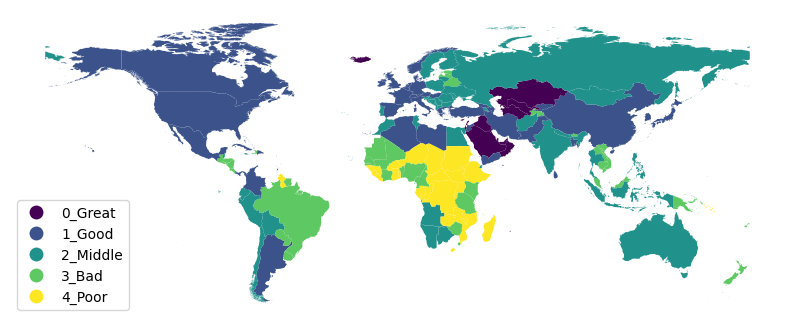

In [121]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='ForestRev_gdp_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

In [122]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

### Exercise 5

<div class="alert-success">

1. Transform the co2 and forest variables.
2. Discretize the result chosen.
3. Make the maps for the co2 and forest variables.
4. Add another variable (merge) from the web (or any other source). Transform it , discretize it, and map it.
   
    
</div>

In [124]:
import pandas as pd

energyCiaLink="https://github.com/AdriMA3/introgeodf/raw/refs/heads/main/Energy%20consumption%20per%20capita.csv"

energyCia=pd.read_csv(energyCiaLink)

energyCia.head()

,name,slug,Btu/person,date_of_information,ranking,region
0,Qatar,qatar,"814,308,000",2023,1,Middle East
1,Singapore,singapore,"643,259,000",2023,2,East and Southeast Asia
2,Bahrain,bahrain,"554,202,000",2023,3,Middle East
3,United Arab Emirates,united-arab-emirates,"450,432,000",2023,4,Middle East
4,Brunei,brunei,"403,365,000",2023,5,East and Southeast Asia
